# Relativistic approximations of the Saha and Planck function in white dwarfs
 relatavstic statmechimcs in white dwarfs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy.constants as c
import astropy.units as u
from astropy import table

import smplotlib

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
Bad value in file 'C:\\Users\\ericm\\smplotlib\\src\\smplotlib\\smplot.mplstyle', line 617 ("hist.bins: 'auto'  # The default number of histogram bins or 'auto'."): Key hist.bins: 'hist.bins' must be one of ['auto', 'sturges', 'fd', 'doane', 'scott', 'rice', 'sqrt'], an int or a sequence of floats


#### This verion of the $\mu$ is the boltzmann approximation withy no $\pm$ 1 

In [10]:
# T and n in log space 
T = np.logspace(10, 20, 100)
n = np.logspace(20, 30, 100)

A = c.h**3 *c.c**5 / (16*np.pi* c.k_B**3)
A = A.value
B = c.m_p**2 * c.c**4 
B = B.value



In [11]:
mu = np.log(A * n/T )*c.k_B.value*T  + B

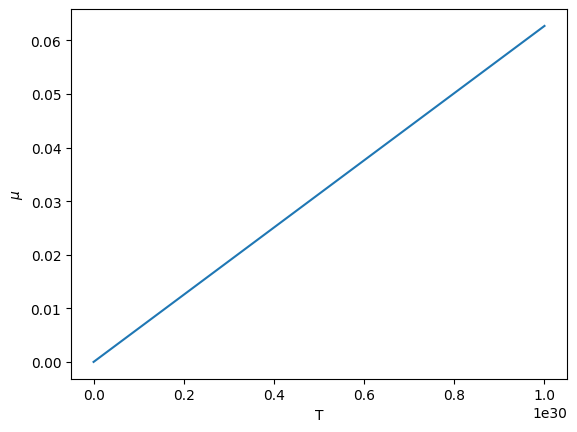

In [12]:
plt.plot(n, mu)

plt.xlabel('T')
plt.ylabel('$\mu$')
plt.show()


In [47]:
# version

n = np.logspace(20, 30, 100)
T = 100000 


A = (c.h**3 *c.c**5 * n) / (16*np.pi* (c.k_B*T)**3)
AA = np.log10(A.value) * c.k_B*T
AA = AA.cgs.value
BB = (c.m_p**2 * c.c**4).value - (c.m_p*c.c**2).value
BB = BB

mu_2 = AA + BB

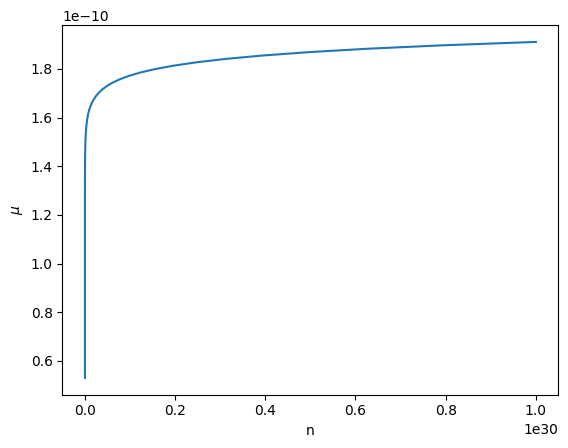

In [48]:
plt.plot(n, mu_2)


plt.xlabel('n')
plt.ylabel('$\mu$')
plt.show()


### Fermi-Dirac distribution of the electrons

# <center> $ n = \frac{8 \pi}{h^3} \int_0^\infty \frac{p^2 dp}{e^{ ( -\mu + mc^2\sqrt{1 + (p/mc)^2})/kT} + 1} $

In [40]:
import astropy.constants as c


In [8]:
# solve numerically the equation
# $ n = \frac{8 \pi}{h^3} \int_0^\infty \frac{p^2 dp}{e^{ ( -\mu + mc^2\sqrt{1 + (p/mc)^2})/kT} + 1} $

T = 100000
n = np.logspace(20, 30, 100)
def integrand(p, mu, T):
    AAA = (-mu + (c.m_p*c.c**2).value * np.sqrt(1 + (p/(c.m_p*c.c)).value**2)) / (c.k_B.value*T)
    exp = np.exp(AAA)
    return p**2 / (exp + 1)

def f(mu, T, n):
    return n - 8*np.pi/(c.h.value**3) * scipy.integrate.quad(integrand, 0, np.inf, args=(mu, T))[0]


# mu = scipy.optimize.brentq(f, -1e-10, 1e-10, args=(T, n[34]))

# use f solve to find mu
# mu = scipy.optimize.fsolve(f, 1e-10, args=(T, n[34]))

for i in np.logspace(10, 40, 100):
    #mu = scipy.optimize.fsolve(f, 442, args=(T, i))
    mu = scipy.optimize.brentq(f, 0.01, 1e50, args=(T, i))
    plt.plot(i, mu, 'o')

plt.xlabel('n')
plt.ylabel('$\mu$')

plt.show()


ValueError: f(a) and f(b) must have different signs

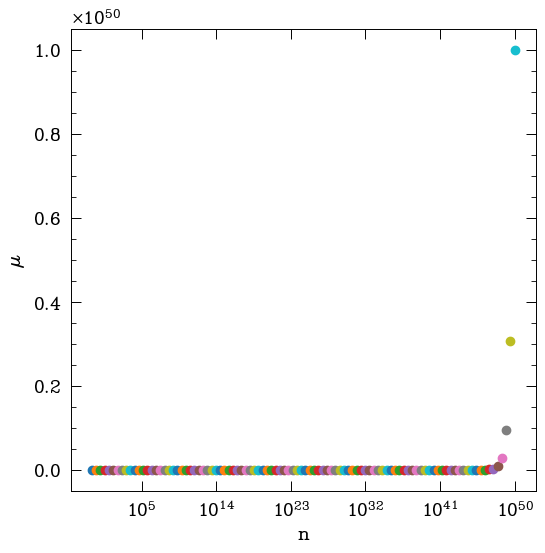

In [16]:
# plot f as a function of n 
# for different T

for i in np.logspace(-1, 50, 100):
    plt.plot(i, f(1e-10, 1e5, i) , 'o')

plt.xlabel('n')
plt.ylabel('$\mu$')
plt.xscale('log')

plt.show()


In [2]:
8*np.pi/(c.h**3)

<Quantity 8.63916505e+100 1 / (J3 s3)>

## Eric -- September 26th

In [112]:
def idealElectronPressure(n_e, T):
    return n_e * c.k_B * T

# # TODO refactor the below function by defining each case as a separate function
# def fullyDegenElectronPressure_routine(n_e, mu_e, thresh):
#     """
#     Calculate the fully degenerate electron pressure as a function of electron density.
    
#     Parameters:
#         n_e (float): Electron number density. Must have units.
#         mu_e (float): Number of baryons per electron.
#         thresh (float): Relativity threshold.
    
#     Returns:
#         list: A list containing the electron number density, fully degenerate electron pressure, and the regime.
#     """
#     # Eqn 37 in Mike's notes
#     p_max = (3 * n_e * c.h**3 / 8 / np.pi)**(1/3)
    
#     # Non-relativistic case
#     if p_max < thresh * c.m_e * c.c:
#         # Eqn 43 in Mike's notes
#         P_e = c.h**2 / 60 / np.pi**(2/3) / c.m_e * (3 * n_e)**(5/3)
#         regime = 'NR'
        
#     # Extreme-relativistic case
#     elif thresh * p_max > c.m_e * c.c:
#         # Eqn 45 in Mike's notes
#         P_e = c.c * c.h / 24 / np.pi**(1/3) * (3 * n_e)**(4/3)
#         regime = 'ER'
        
#     # Intermediate densities
#     else:
#         # Eqn 47 in Mike's notes
#         y = (p_max / c.m_e / c.c).si
#         P_e = np.pi * c.m_e**4 * c.c**5 / 3 / c.h**3 * (y * (1 + y**2)**(1/2) * (2 * y**2 - 3) + 3 * np.arcsinh(y).value)
#         regime = 'IN'
    
#     # Note, if changing units here, update units parameter in fullyDegenElectronPressure for the QTable
#     return [n_e.si, P_e.si, regime]

def fullyDegenElectronPressure_routine(n_e, mu_e, thresh):
    # Eqn 37 in Mike's notes
    p_max = (3 * n_e * c.h**3 / 8 / np.pi)**(1/3)
    
    if p_max < thresh * c.m_e * c.c:
        return calculate_non_relativistic_pressure_routine(n_e)
    elif thresh * p_max > c.m_e * c.c:
        return calculate_extreme_relativistic_pressure_routine(n_e)
    else:
        return calculate_intermediate_pressure_routine(n_e, p_max)
    
def calculate_non_relativistic_pressure_routine(n_e):
    # Eqn 43 in Mike's notes
    P_e = c.h**2 / 60 / np.pi**(2/3) / c.m_e * (3 * n_e)**(5/3)
    regime = 'NR'
    return [n_e.si.value, P_e.si.value, regime]

def calculate_extreme_relativistic_pressure_routine(n_e):
    # Eqn 45 in Mike's notes
    P_e = c.c * c.h / 24 / np.pi**(1/3) * (3 * n_e)**(4/3)
    regime = 'ER'
    return [n_e.si.value, P_e.si.value, regime]

def calculate_intermediate_pressure_routine(n_e, p_max):
    # Eqn 47 in Mike's notes
    y = (p_max / c.m_e / c.c).si
    P_e = np.pi * c.m_e**4 * c.c**5 / 3 / c.h**3 * (y * (1 + y**2)**(1/2) * (2 * y**2 - 3) + 3 * np.arcsinh(y).value)
    regime = 'IN'
    return [n_e.si.value, P_e.si.value, regime]

def fullyDegenElectronPressure(n_e, mu_e=2, thresh=0.001):
    # Check if input has multiple values (numpy array, list, etc.)
    if type(n_e.value) == np.ndarray or type(n_e.value) == list:
        output = []
        
        # Calculate pressure for each value of n_e
        for i, n in enumerate(n_e):
            output.append(fullyDegenElectronPressure_routine(n, mu_e, thresh))
        
    else:
        output = fullyDegenElectronPressure_routine(n_e, mu_e, thresh)
    
    # Create QTable with appropriate units and dtype
    return table.QTable(np.asarray(output), names=['n_e', 'P_e', 'regime'],
                    units=[1/u.m**3, u.N/u.m**2, None], dtype=['f8', 'f8', 'S2'],
                    meta={'regime': ['non-relativistic', 'extreme-relativistic', 'intermediate']})
    
def calculate_extreme_relativistic_pressure(n_e):
    if type(n_e.value) == np.ndarray or type(n_e.value) == list:
        output = []
        
        # Calculate pressure for each value of n_e
        for i, n in enumerate(n_e):
            output.append(calculate_extreme_relativistic_pressure_routine(n))
        
    else:
        output = calculate_extreme_relativistic_pressure_routine(n_e)
    
    # Create QTable with appropriate units and dtype
    return table.QTable(np.asarray(output), names=['n_e', 'P_e', 'regime'],
                    units=[1/u.m**3, u.N/u.m**2, None], dtype=['f8', 'f8', 'S2'],
                    meta={'regime': ['non-relativistic', 'extreme-relativistic', 'intermediate']})

def calculate_non_relativistic_pressure(n_e):
    if type(n_e.value) == np.ndarray or type(n_e.value) == list:
        output = []
        
        # Calculate pressure for each value of n_e
        for i, n in enumerate(n_e):
            output.append(calculate_non_relativistic_pressure_routine(n))
        
    else:
        output = calculate_non_relativistic_pressure_routine(n_e)
    
    # Create QTable with appropriate units and dtype
    return table.QTable(np.asarray(output), names=['n_e', 'P_e', 'regime'],
                    units=[1/u.m**3, u.N/u.m**2, None], dtype=['f8', 'f8', 'S2'],
                    meta={'regime': ['non-relativistic', 'extreme-relativistic', 'intermediate']})

def calculate_intermediate_pressure(n_e):
    if type(n_e.value) == np.ndarray or type(n_e.value) == list:
        output = []
        
        # Calculate pressure for each value of n_e
        for i, n in enumerate(n_e):
            p_max = (3 * n * c.h**3 / 8 / np.pi)**(1/3)
            output.append(calculate_intermediate_pressure_routine(n, p_max))
        
    else:
        output = calculate_intermediate_pressure_routine(n_e, p_max)
    
    # Create QTable with appropriate units and dtype
    return table.QTable(np.asarray(output), names=['n_e', 'P_e', 'regime'],
                    units=[1/u.m**3, u.N/u.m**2, None], dtype=['f8', 'f8', 'S2'],
                    meta={'regime': ['non-relativistic', 'extreme-relativistic', 'intermediate']})
    

In [41]:
fullyDegenElectronPressure(10**200 / u.cm ** 3)

n_e,P_e,regime
1 / m3,N / m2,
float64,float64,bytes2
9.999999999999999e+205,1.1349512461656704e+249,ER


In [42]:
number_density_range = np.logspace(1, 50, 100) / u.cm ** 3

fullyDegenElectronPressure(number_density_range)

n_e,P_e,regime
1 / m3,N / m2,
float64,float64,bytes2
9999999.999999998,1.0846942108064506e-26,NR
31257158.496882364,7.248082820449793e-26,NR
97700995.72992256,4.843273251457737e-25,NR
305385550.88334155,3.236344888623982e-24,NR
954548456.6618346,2.162572230458013e-23,NR
2983647240.28334,1.4450618870649993e-22,NR
9326033468.8322,9.656111495548038e-22,NR
29150530628.251816,6.452352667319449e-21,NR


In [43]:
# Define our three regimes
# TODO figure our what the threshold should be to demarcate the three regimes

NR_reg = fullyDegenElectronPressure(number_density_range)[fullyDegenElectronPressure(number_density_range)['regime'] == 'NR']
ER_reg = fullyDegenElectronPressure(number_density_range)[fullyDegenElectronPressure(number_density_range)['regime'] == 'ER']
IN_reg = fullyDegenElectronPressure(number_density_range)[fullyDegenElectronPressure(number_density_range)['regime'] == 'IN']

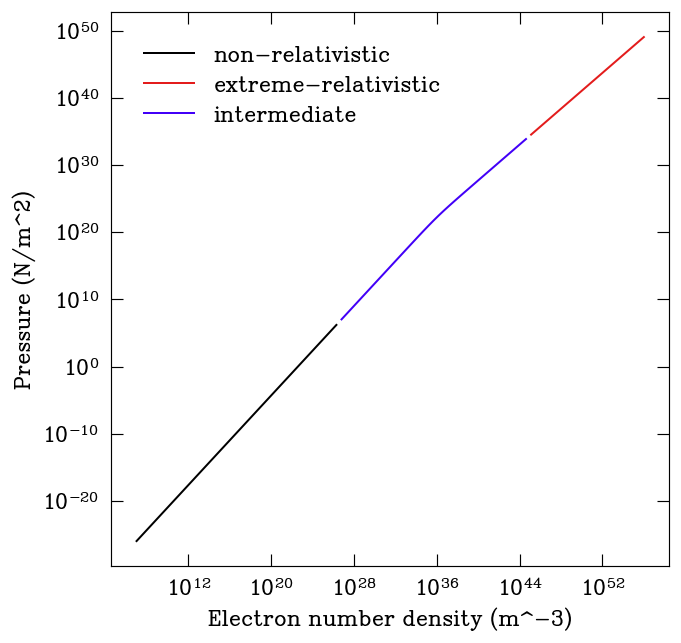

In [44]:
# Plot the three regimes as different colors
fig, ax = plt.subplots()

ax.plot(NR_reg['n_e'], NR_reg['P_e'], label='non-relativistic')
ax.plot(ER_reg['n_e'], ER_reg['P_e'], label='extreme-relativistic')
ax.plot(IN_reg['n_e'], IN_reg['P_e'], label='intermediate')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
ax.set_ylabel('Pressure (N/m^2)')
ax.set_xlabel('Electron number density (m^-3)')
plt.show()

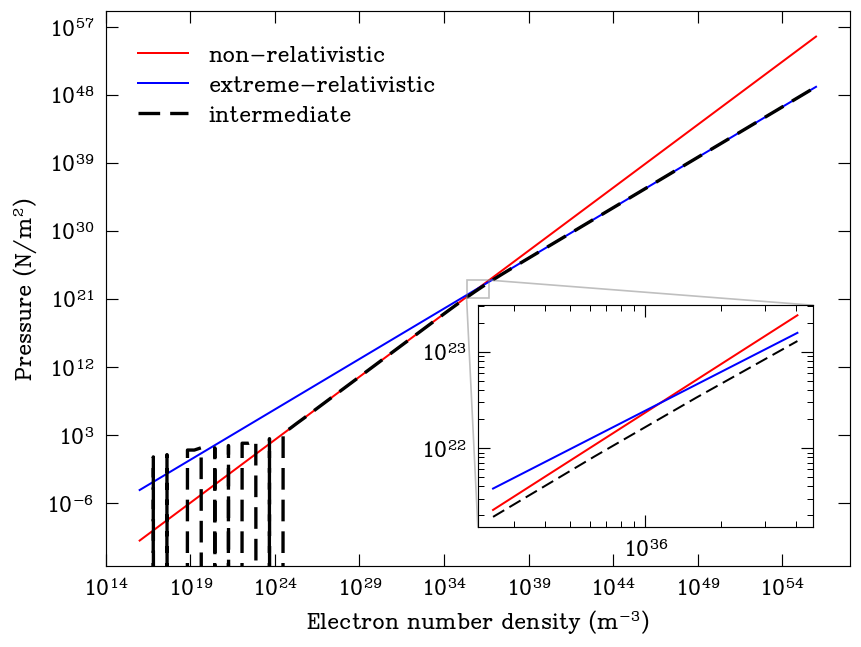

In [130]:
# Now redefine the threshold to overlay the three different cases over each other for the entire ranges

number_density_range = np.logspace(10, 50, 100) / u.cm ** 3
    
NR_reg_full = calculate_non_relativistic_pressure(number_density_range)
ER_reg_full = calculate_extreme_relativistic_pressure(number_density_range)
IN_reg_full = calculate_intermediate_pressure(number_density_range)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(NR_reg_full['n_e'], NR_reg_full['P_e'], label='non-relativistic', c='r')
ax.plot(ER_reg_full['n_e'], ER_reg_full['P_e'], label='extreme-relativistic', c='b')
ax.plot(IN_reg_full['n_e'], IN_reg_full['P_e'], label='intermediate', c='k', ls='--', lw=2)

# ax.set_xlim(10**28, 10**32)
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
ax.set_ylabel(r'Pressure $(N/m^2)$')
ax.set_xlabel(r'Electron number density $(m^{-3})$')

# Inset axes and indicate zoom
axins = ax.inset_axes((0.5, 0.07, 0.45, 0.4))
axins.plot(NR_reg_full['n_e'][(NR_reg_full['n_e']>=10**35 / u.m ** 3) & (NR_reg_full['n_e']<=10**37 / u.m ** 3)], NR_reg_full['P_e'][(NR_reg_full['n_e']>=10**35 / u.m ** 3) & (NR_reg_full['n_e']<=10**37 / u.m ** 3)], label='non-relativistic', c='r')
axins.plot(ER_reg_full['n_e'][(ER_reg_full['n_e']>=10**35 / u.m ** 3) & (ER_reg_full['n_e']<=10**37 / u.m ** 3)], ER_reg_full['P_e'][(ER_reg_full['n_e']>=10**35 / u.m ** 3) & (ER_reg_full['n_e']<=10**37 / u.m ** 3)], label='extreme-relativistic', c='b')
axins.plot(IN_reg_full['n_e'][(IN_reg_full['n_e']>=10**35 / u.m ** 3) & (IN_reg_full['n_e']<=10**37 / u.m ** 3)], IN_reg_full['P_e'][(IN_reg_full['n_e']>=10**35 / u.m ** 3) & (IN_reg_full['n_e']<=10**37 / u.m ** 3)], label='intermediate', c='k', ls='--')
axins.set_yscale('log')
axins.set_xscale('log')
# axins.set_xticklabels([])
# axins.set_yticklabels([])

ax.indicate_inset_zoom(axins)

plt.show()

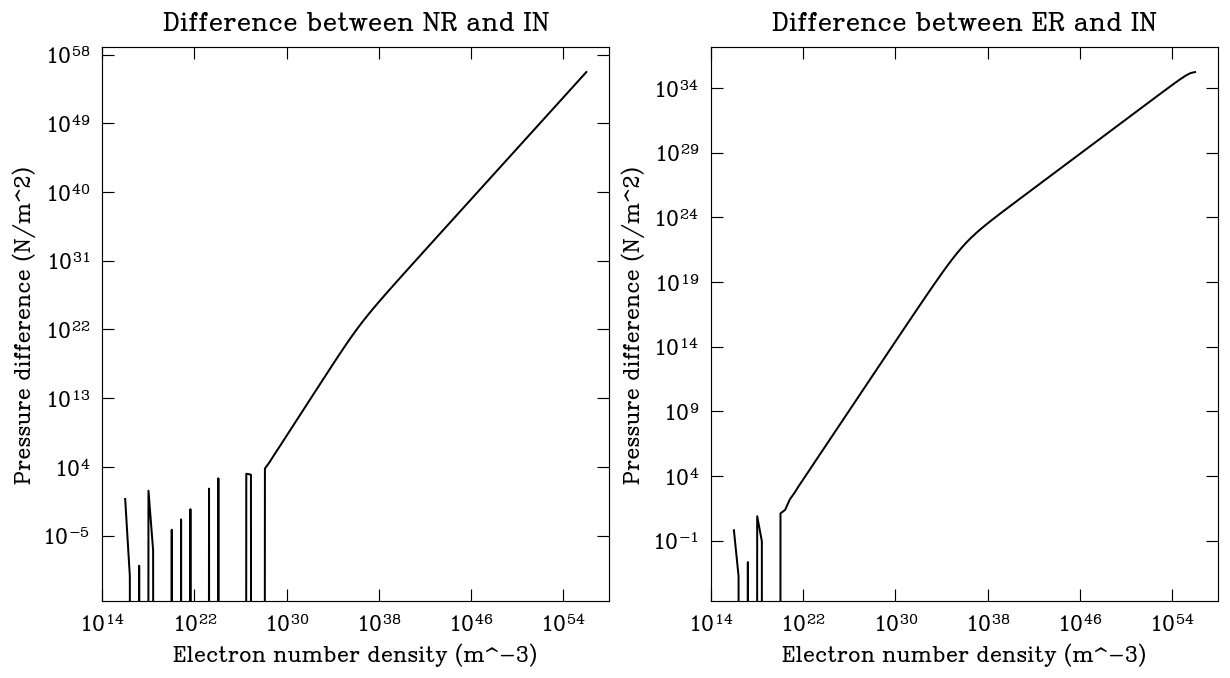

In [152]:
# Now plot the difference between the three cases over the range
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].plot(NR_reg_full['n_e'], (NR_reg_full['P_e'] - IN_reg_full['P_e']), label='non-rel - intermediate')
ax[1].plot(ER_reg_full['n_e'], (ER_reg_full['P_e'] - IN_reg_full['P_e']), label='extreme-rel - intermediate')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].set_xlabel('Electron number density (m^-3)')
ax[0].set_ylabel('Pressure difference (N/m^2)')
ax[1].set_xlabel('Electron number density (m^-3)')
ax[1].set_ylabel('Pressure difference (N/m^2)')
ax[0].set_title('Difference between NR and IN')
ax[1].set_title('Difference between ER and IN')
plt.show()

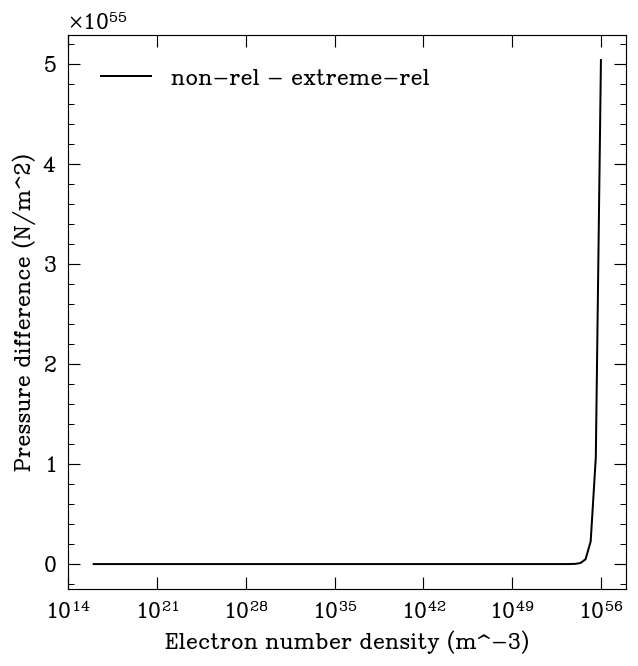

In [140]:
# Plot the difference between the non-relativistic and extreme-relativistic cases
plt.subplots()
plt.plot(NR_reg_full['n_e'], NR_reg_full['P_e'] - ER_reg_full['P_e'], label='non-rel - extreme-rel')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.xlabel('Electron number density (m^-3)')
plt.ylabel('Pressure difference (N/m^2)')
plt.show()

In [11]:
# What number densities do the boundaries of each regime correspond to?
central_value = 8*np.pi / 3 * (c.m_e * c.c/c.h) ** 3
central_value.si

<Quantity 5.8651566e+35 1 / m3>

In [178]:
# Now we want to use our electron presure code to actually compute the inner structure of a WD for a range of masses up to the Chandrasekhar limit. We use a polytropic model

# Try ChatGPTs method for ODE solving
from scipy.integrate import solve_bvp, odeint, solve_ivp

# Define your differential equations drho/dr and dm/dr as functions
max_mass = 1.44 * c.M_sun

def drhodr(r, rho, m, mu_e = 2):
    K_NR = c.h**2 / 5 / c.m_e * (3 / 8 / np.pi)**(2/3)
    return (- 3/5 * (c.G * (c.m_p + c.m_e)**(5/3) * mu_e**(5/3) * m * rho**(1/3)) / (K_NR * r**2)).si.value

def dmdr(r, rho):
    return (4 * np.pi * r**2 * rho)

def system(r, y):
    return np.array([drhodr(r, y[0], y[1]), dmdr(r, y[0])])

def bc(ya, yb):
    return np.array([ya[1]-0.00001, yb[0]-max_mass.to(u.kg).value])

r_span = np.linspace(0, 1e10, 1000)

y0 = np.zeros((2, 1000))

sol = solve_bvp(system, bc, r_span, y0)


In [179]:
sol

       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [ 0.000e+00  1.001e+07 ...  9.990e+09  1.000e+10]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000002DD185F2A90>
             p: None
             y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
            yp: [[       nan -0.000e+00 ... -0.000e+00 -0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
 rms_residuals: [       nan  0.000e+00 ...  0.000e+00  0.000e+00]
         niter: 1